In [56]:
# importing necessary packages

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

%matplotlib inline

### 1a. K-Nearest Neighbors

In [57]:
# importing CSV

url = 'https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/HW2.csv'
df = pd.read_csv(url)

df.head()

,age,had_cancer,gender_id,income_in_k,state,credit_score,num_credit_sources,utilization_rate,gave_loan
0,39,0,Female,54,TX,448,4,0.32,0
1,43,0,Female,66,NJ,399,4,0.35,0
2,42,0,Male,50,NE,509,8,0.23,0
3,46,0,Female,79,TX,540,6,0.15,0
4,43,0,Female,49,NV,485,10,0.20,0


In [58]:
# checking for missing data
df.isnull().sum()

age                   0
had_cancer            0
gender_id             0
income_in_k           0
state                 0
credit_score          0
num_credit_sources    0
utilization_rate      0
gave_loan             0
dtype: int64

In [59]:
# using get_dummies() to convert gender into dummy variables
dummies = pd.get_dummies(df['gender_id'])

# concating new columns to dataframe
df = pd.concat([df,dummies], axis = 1)

# removing original column from dataframe
df.drop('gender_id', inplace = True, axis = 1)
df.head()

,age,had_cancer,income_in_k,state,credit_score,num_credit_sources,utilization_rate,gave_loan,Female,Male,Non-Binary,Survey Choices Do Not Accurately Reflect My Identity
0,39,0,54,TX,448,4,0.32,0,1,0,0,0
1,43,0,66,NJ,399,4,0.35,0,1,0,0,0
2,42,0,50,NE,509,8,0.23,0,0,1,0,0
3,46,0,79,TX,540,6,0.15,0,1,0,0,0
4,43,0,49,NV,485,10,0.20,0,1,0,0,0


In [60]:
# using get_dummies() to convert gender into dummy variables
dummies = pd.get_dummies(df['state'])

# concating new columns to dataframe
df = pd.concat([df,dummies], axis = 1)

# removing original column from dataframe
df.drop('state', inplace = True, axis = 1)

df.head()



,age,had_cancer,income_in_k,credit_score,num_credit_sources,utilization_rate,gave_loan,Female,Male,Non-Binary,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,39,0,54,448,4,0.32,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,43,0,66,399,4,0.35,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,42,0,50,509,8,0.23,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,46,0,79,540,6,0.15,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,43,0,49,485,10,0.20,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Accuracy for our training dataset with tuning is :  0.741875
Accuracy for our test dataset with tuning is :  0.72
The best k value was found to be:  18


Text(0.5, 1.0, 'Confusion Matrix for Test Set')

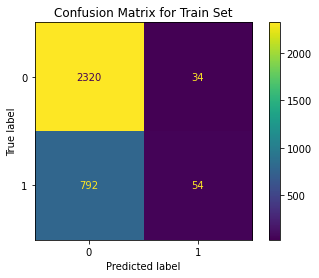

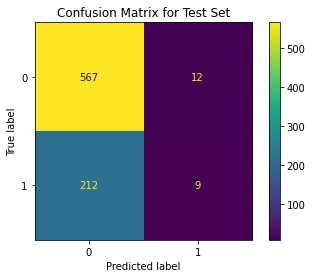

In [61]:
# KNN model

# all predictors
predictors = ['age', 'had_cancer', 'income_in_k', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 
'DE', 'FL', 'GA', 'HI','IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 
'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 
'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', 'credit_score', 'num_credit_sources', 
'utilization_rate', 'Female', 'Male', 'Non-Binary', 'Survey Choices Do Not Accurately Reflect My Identity']

# predictors with only continuous/interval columns
contin = ['age', 'credit_score', 'income_in_k', 'num_credit_sources', 'utilization_rate']

X = df[predictors]
y = df['gave_loan']

# split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# create model
knn = KNeighborsClassifier()

# create z score object
z = make_column_transformer((StandardScaler(), contin))

# make pipeline
pipe = make_pipeline(z, knn)

# find the k 'key'
pipe.get_params().keys()

# choose potential values of k
ks = {"kneighborsclassifier__n_neighbors": range(1,30)}

# use grid search to find best parameters
grid = GridSearchCV(pipe, ks, scoring = "accuracy", cv = 5, refit = True)

# fit model
knnmod = grid.fit(X_train, y_train)

# finding the accuracy of the training/test datasets
print('Accuracy for our training dataset with tuning is : ', knnmod.score(X_train, y_train))
print('Accuracy for our test dataset with tuning is : ', knnmod.score(X_test, y_test))

# getting the k value used for the KNN model
print('The best k value was found to be: ', knnmod.best_estimator_.get_params()['kneighborsclassifier__n_neighbors'])

# plotting the confusion matrices
plot_confusion_matrix(knnmod, X_train, y_train)
plt.title('Confusion Matrix for Train Set')

plot_confusion_matrix(knnmod, X_test, y_test)
plt.title('Confusion Matrix for Test Set')

### 1b. Decision Tree

Accuracy for our training dataset with tuning is :  0.735625
Accuracy for our test dataset with tuning is :  0.72375
The best max_depth value was found to be:  1


Text(0.5, 1.0, 'Confusion Matrix for Test Set')

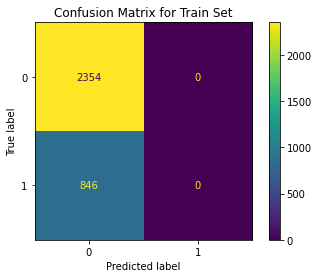

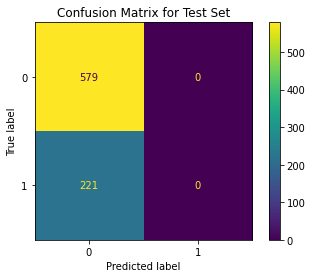

In [62]:
# Decision Tree Model

X = df[predictors]
y = df['gave_loan']

# a new TTS is not made in this model because we want to use the same training set

# z-scoring
z = make_column_transformer((StandardScaler(), contin))

# creating decision tree model
tree = DecisionTreeClassifier()

# making pipeline
pipe = make_pipeline(z, tree)

# find the max_depth 'key'
pipe.get_params().keys()

# choose potential values of max_depth
depths = {"decisiontreeclassifier__max_depth": range(1,9)}

# use grid search to find best value
grid = GridSearchCV(pipe, depths, scoring = "accuracy", cv = 5, refit = True)

# fit model
dtmod = grid.fit(X_train, y_train)

# finding the accuracy of the training dataset
print('Accuracy for our training dataset with tuning is : ', dtmod.score(X_train, y_train))
print('Accuracy for our test dataset with tuning is : ', dtmod.score(X_test, y_test))

print('The best max_depth value was found to be: ', dtmod.best_estimator_.get_params()['decisiontreeclassifier__max_depth'])

plot_confusion_matrix(dtmod, X_train, y_train)
plt.title('Confusion Matrix for Train Set')

plot_confusion_matrix(dtmod, X_test, y_test)
plt.title('Confusion Matrix for Test Set')




### 1c. Logistic Regression

The accuracy score of the train set is:  0.7359375
The accuracy score of the test set is:  0.7225


Text(0.5, 1.0, 'Confusion Matrix for Test Set')

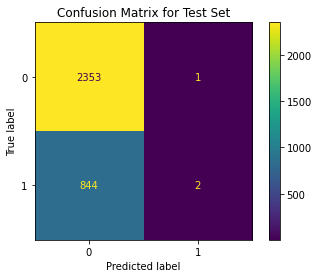

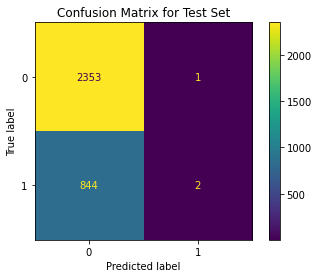

In [63]:
# Logistic Regression Model

# a new TTS is not made in this model because we want to use the same training set

# creating Logistic Regression model
lr = LogisticRegression()

# z scoring continuous/interval variables
zscore = StandardScaler()
zscore.fit(X_train[contin])
Xz_train = zscore.transform(X_train[contin])
Xz_test = zscore.transform(X_test[contin])

# fit model
lrmod = lr.fit(X_train, y_train)
    
a = accuracy_score(y_test, lrmod.predict(X_test))
b = accuracy_score(y_train, lrmod.predict(X_train))
print('The accuracy score of the train set is: ', b)
print('The accuracy score of the test set is: ', a)

plot_confusion_matrix(lrmod, X_train, y_train)
plt.title('Confusion Matrix for Test Set')

plot_confusion_matrix(lrmod, X_train, y_train)
plt.title('Confusion Matrix for Test Set')


### 2a. Using accuracy AND confusion matrices, **thoroughly discuss which model did best (if you had to pick one), how can you tell?**

Based on the confusion matricies for the test and train set for each of the models (KNN, Decision Trees, Logistic Regression), the Logistic Regression model performed the best. The accuracy score for the test set in the logistic regression model was ~0.739, which was the highest compared to the  K-Nearest Neighbors (KNN) and Decision Tree models, which had accuracy scores of of ~0.738 and ~0.733, respectively. Although the Logistic Regression model had the highest accuracy, it was marginally better with the difference in score being in the hundreth place. All models performed relatively well, given the high accuracy scores.

In addition, the confusion matrices across all three models had similar characteristics, with a majority of the predicted label being '0,' which represented individuals that were predicted to not recieve a loan. The confusion matrix of the Decision Tree model was the most 'abnormal', with the model giving no prediction that any individual would recieve a loan. The K-Nearest Neighbor and Logistic Regression model had more spread out results, but both models predicted that most individuals would not recieve a loan. Although the confusion matrices seem to heavily favor giving no loans, the high accuracy shows that most people did in fact DID NOT recieve a loan. The high number of individuals that did not recieve a loan seem to have influence all the models to predict that the majority of people will not recieve a loan.




### 2b.  **Are there differences in how accurate each of the three models you made in part 1 are for different gender IDs?** 


In [72]:
# grabbing all females from dataset
female = df.loc[(df['Female'] == 1)]

# grabbing all males from dataset
male = df.loc[(df['Male'] == 1)]

# grabbing all non-binary from dataset
nonbinary = df.loc[(df['Non-Binary'] == 1)]

# grabbing all 'other' from dataset
other = df.loc[(df['Survey Choices Do Not Accurately Reflect My Identity'] == 1)]

# testing metrics for females
X = female[predictors]
y = female['gave_loan']
Zmetric = StandardScaler()
X[contin] = Zmetric.fit_transform(X[contin])

# KNN model
femaleKNN = knnmod.predict(X)

# Decision Tree model
femaleDT = dtmod.predict(X)

# Logistic Regression model
femaleLR = lrmod.predict(X)

# grabbing accuracy values for each model
femaleKNN_accuracy = accuracy_score(y, femaleKNN)
femaleDT_accuracy = accuracy_score(y, femaleDT)
femaleLR_accuracy = accuracy_score(y, femaleLR)

# testing metrics for males
X = male[predictors]
y = male['gave_loan']
Zmetric = StandardScaler()
X[contin] = Zmetric.fit_transform(X[contin])

# KNN model
maleKNN = knnmod.predict(X)

# Decision Tree model
maleDT = dtmod.predict(X)

# Logistic Regression model
maleLR = lrmod.predict(X)

# grabbing accuracy values for each model
maleKNN_accuracy = accuracy_score(y, maleKNN)
maleDT_accuracy = accuracy_score(y, maleDT)
maleLR_accuracy = accuracy_score(y, maleLR)

# testing metrics for nonbinary
X = nonbinary[predictors]
y = nonbinary['gave_loan']
Zmetric = StandardScaler()
X[contin] = Zmetric.fit_transform(X[contin])

# KNN model
nonbinaryKNN = knnmod.predict(X)

# Decision Tree model
nonbinaryDT = dtmod.predict(X)

# Logistic Regression model
nonbinaryLR = lrmod.predict(X)

# grabbing accuracy values for each model
nonbinaryKNN_accuracy = accuracy_score(y, nonbinaryKNN)
nonbinaryDT_accuracy = accuracy_score(y, nonbinaryDT)
nonbinaryLR_accuracy = accuracy_score(y, nonbinaryLR)

# testing metrics for other
X = other[predictors]
y = other['gave_loan']
Zmetric = StandardScaler()
X[contin] = Zmetric.fit_transform(X[contin])

# KNN model
otherKNN = knnmod.predict(X)

# Decision Tree model
otherDT = dtmod.predict(X)

# Logistic Regression model
otherLR = lrmod.predict(X)

# grabbing accuracy values for each model
otherKNN_accuracy = accuracy_score(y, otherKNN)
otherDT_accuracy = accuracy_score(y, otherDT)
otherLR_accuracy = accuracy_score(y, otherLR)

# turning results into dataframe
to_df1 = [["Female", "KNN", femaleKNN_accuracy], ["Female", "Decision Tree", femaleDT_accuracy], 
["Female", "Logistic Regression", femaleLR_accuracy], ["Male", "KNN", maleKNN_accuracy], 
["Male", "Decision Tree", maleDT_accuracy], ["Male", "Logistic Regression", maleLR_accuracy], 
["Non-Binary", "KNN", nonbinaryKNN_accuracy], ["Non-Binary", "Decision Tree", nonbinaryDT_accuracy], 
["Non-Binary", "Logistic Regression", femaleLR_accuracy], 
["Survey Choices Do Not Accurately Reflect", "KNN", otherKNN_accuracy], 
["Survey Choices Do Not Accurately Reflect", "Decision Tree", otherDT_accuracy], 
["Survey Choices Do Not Accurately Reflect", "Logistic Regression", otherLR_accuracy]]

df1 = pd.DataFrame(to_df1, columns = ["Gender", "Model", "Accuracy Score"])
df1



,Gender,Model,Accuracy Score
0,Female,KNN,0.740559
1,Female,Decision Tree,0.740559
2,Female,Logistic Regression,0.740559
3,Male,KNN,0.722846
4,Male,Decision Tree,0.722846
5,Male,Logistic Regression,0.722846
6,Non-Binary,KNN,0.767857
7,Non-Binary,Decision Tree,0.767857
8,Non-Binary,Logistic Regression,0.740559
9,Survey Choices Do Not Accurately Reflect,KNN,0.805556


When evaluating the accuracy score of each gender (Male, Female, Non-Binary, Survey Choices Do Not Accurately Reflect My Identity) using each model (K-Nearest Neighbors, Decision Trees, Logistic Regression), there was marginal differences at best between different gender ids. For clarity, the gender option 'Survey Choices Do Not Accurately Reflect My Identiy' will be referred to as 'other' for the remainder of this discussion. The data produced above in the dataframe shows that the accuracy score in females, males, and other were consistent, with no change in value. However, there was a small difference in accuracy between the logistic regression model for non-binary individuals when compared to the K-Nearest Neighbors and Decision Tree model (0.767857 versus 0.740559). Overall, the difference in accuracy score between each model in each gender did not differ greatly. When examining the accuracy across different genders, the data suggests that the 'other' group had the highest accuracy with a score of 0.805556 while males had the lowest accuracy score with a score of 0.722846. 

### 2c. **Are your models better at predicting people who got loans, or didn't get loans? How can you tell? Discuss thoroughly the possible implications of this.**

The models are more proficient at predicting people who did not get loans. The confusion matrices for the each of the models yielded similar characteristics. Every model seemed to heavily favor that most individuals did not recieve a loan. Each confusion matrix had high number of predictions in favor of an individual not recieving a loan, which led to a majority of the predictions lie in the left half of the confusion matrix (prediction = 0). However, the accuracy of the models were high, with a majority of the predictions laying in the top left quadrant of the confusion matrix, denoting that the model was correct in predicting that an individual did not recieve a loan. If we assume that the data is from a single company, the results suggest that the company is particulary strict with their approval criteria, with the majority of individuals unsuccessful in recieving a loan. Similarly, if we assume that the data describes indivduals who apply for loans in generally, it suggests that most are unsuccessful with their loan application.